In [1]:
import config
import torch
from plot import plot_loader_predictions
from yolodwg import DwgKeyPointsModel, DwgKeyPointsResNet50, DwgDataset, EntityDataset

In [2]:
checkpoint = torch.load('runs/7/best.weights', map_location=config.device)
max_points = checkpoint['max_points']
num_coordinates = checkpoint['num_coordinates']
num_pnt_classes = checkpoint['num_pnt_classes']

model = DwgKeyPointsResNet50(max_points=max_points,num_pnt_classes=num_pnt_classes,num_coordinates=num_coordinates)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(config.device)
model.eval()

DwgKeyPointsResNet50(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(

Entity dataset. Images: 3861 Max points:45.


/home/mk/.local/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/home/mk/yolodwg/plot.py:90: RuntimeWarning: overflow encountered in exp
  p_pnt_cls = np.exp(p_pnt_cls)/sum(np.exp(p_pnt_cls)) # softmax to sum up to 1
/home/mk/yolodwg/plot.py:90: RuntimeWarning: invalid value encountered in true_divide
  p_pnt_cls = np.exp(p_pnt_cls)/sum(np.exp(p_pnt_cls)) # softmax to sum up to 1
/home/mk/yolodwg/plot.py:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `f

[<Figure size 504x504 with 4 Axes>,
 <Figure size 504x504 with 4 Axes>,
 <Figure size 504x504 with 4 Axes>,
 <Figure size 504x504 with 4 Axes>,
 <Figure size 504x504 with 4 Axes>,
 <Figure size 504x504 with 4 Axes>,
 <Figure size 504x504 with 4 Axes>,
 <Figure size 504x504 with 4 Axes>,
 <Figure size 504x504 with 4 Axes>,
 <Figure size 504x504 with 4 Axes>,
 <Figure size 504x504 with 4 Axes>,
 <Figure size 504x504 with 4 Axes>,
 <Figure size 504x504 with 4 Axes>,
 <Figure size 504x504 with 4 Axes>,
 <Figure size 504x504 with 4 Axes>,
 <Figure size 504x504 with 4 Axes>,
 <Figure size 504x504 with 4 Axes>,
 <Figure size 504x504 with 4 Axes>,
 <Figure size 504x504 with 4 Axes>,
 <Figure size 504x504 with 4 Axes>,
 <Figure size 504x504 with 4 Axes>,
 <Figure size 504x504 with 4 Axes>,
 <Figure size 504x504 with 4 Axes>,
 <Figure size 504x504 with 4 Axes>,
 <Figure size 504x504 with 4 Axes>,
 <Figure size 504x504 with 4 Axes>,
 <Figure size 504x504 with 4 Axes>,
 <Figure size 504x504 with 4

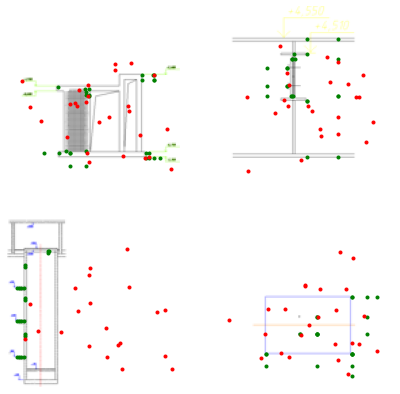

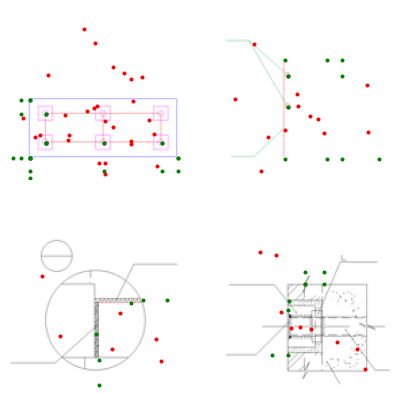

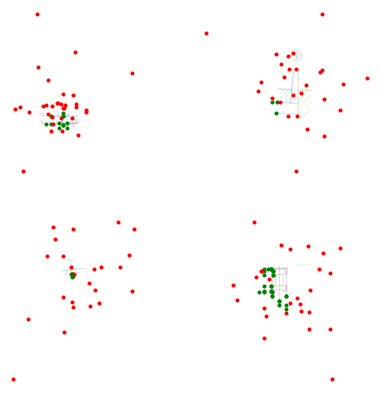

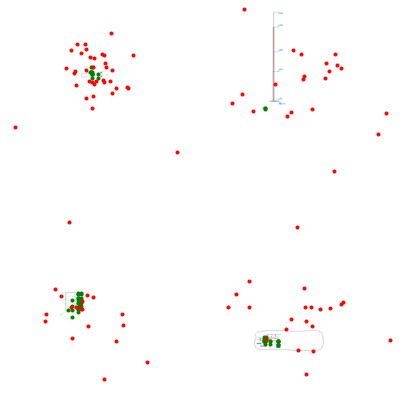

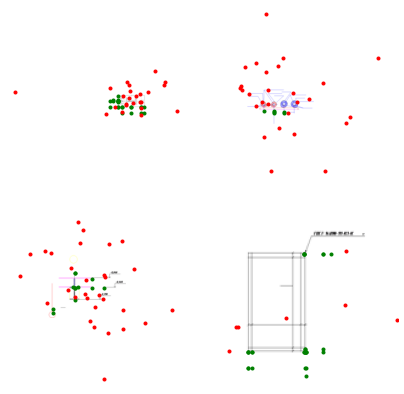

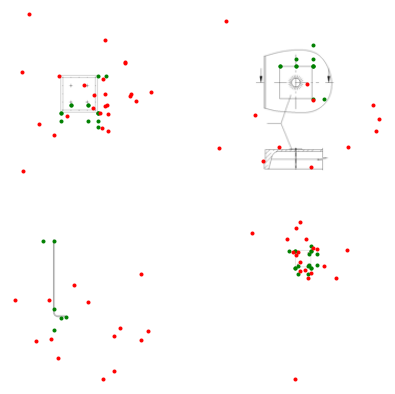

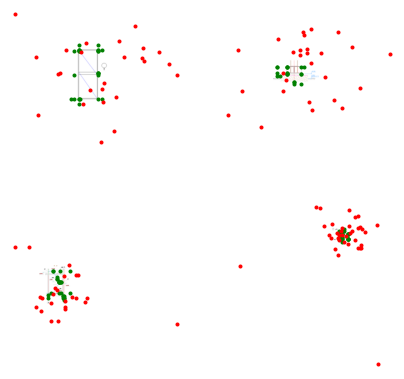

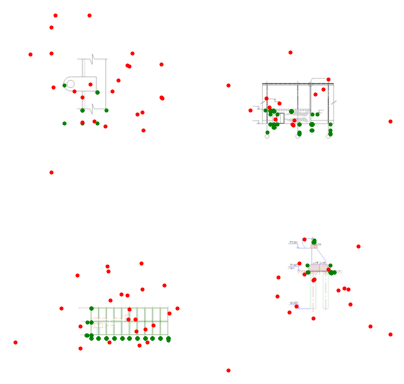

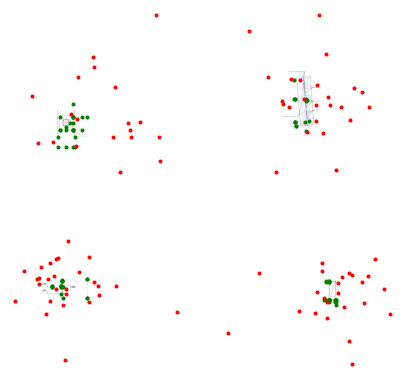

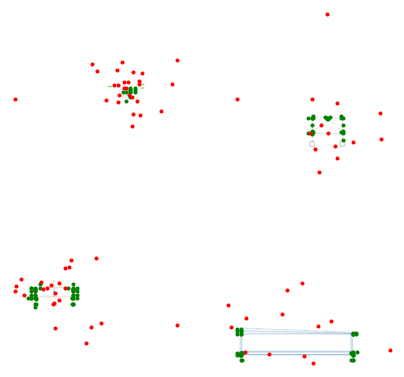

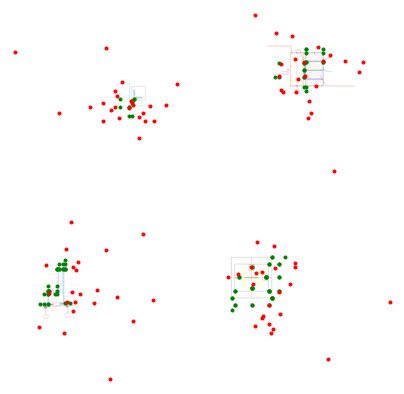

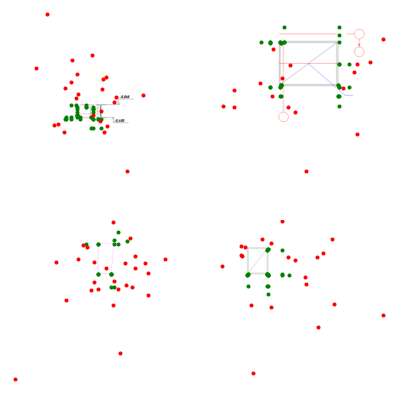

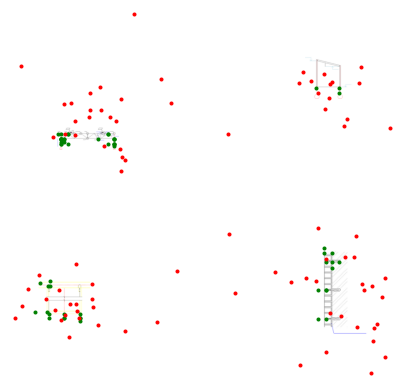

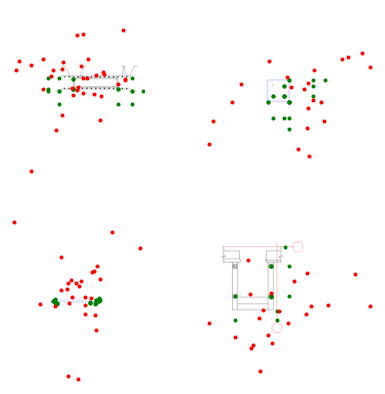

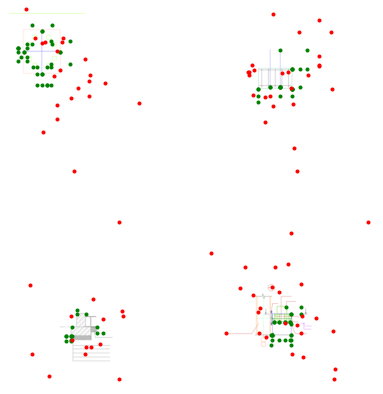

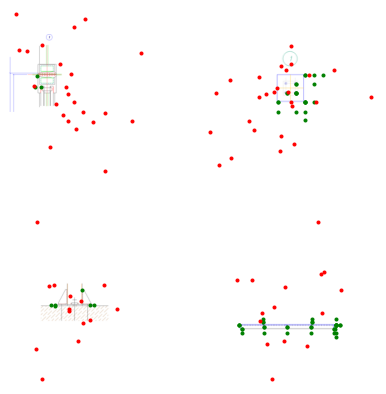

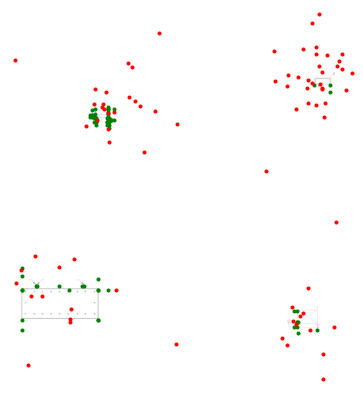

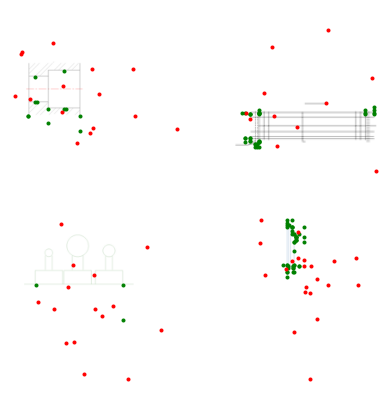

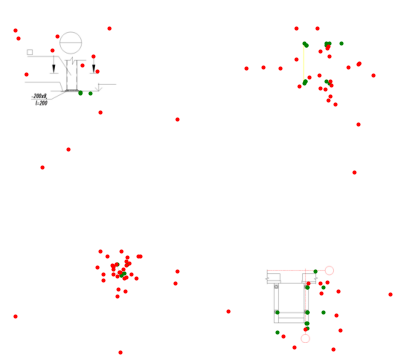

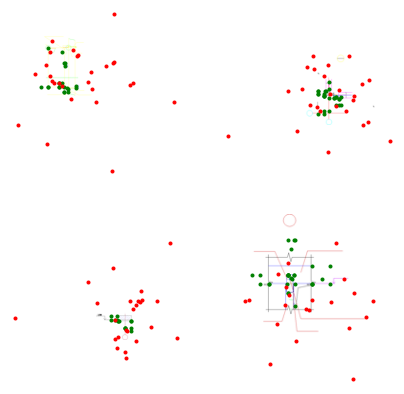

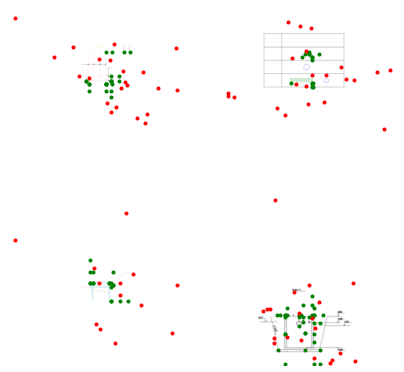

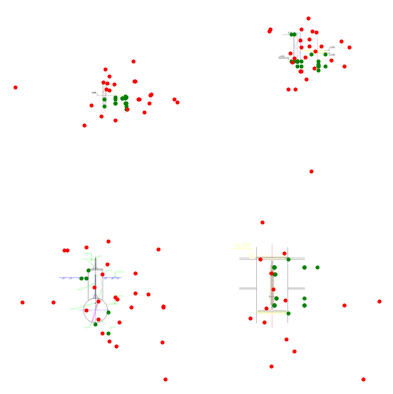

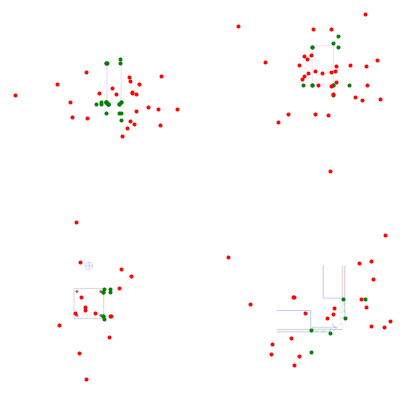

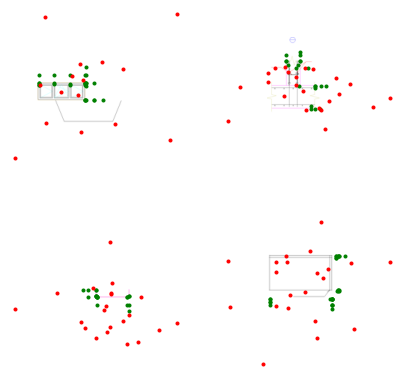

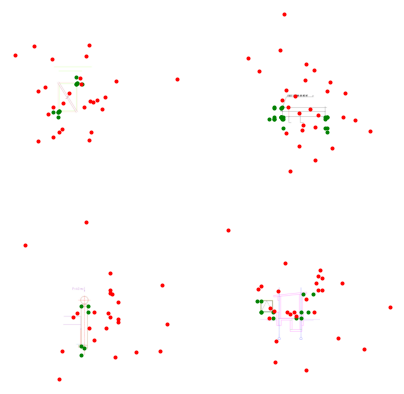

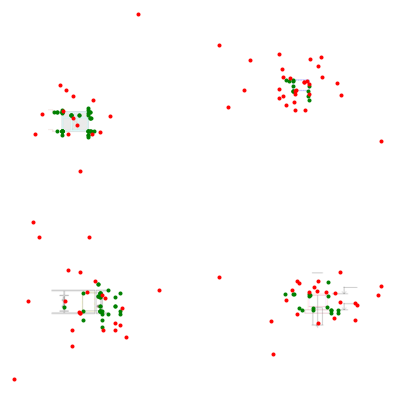

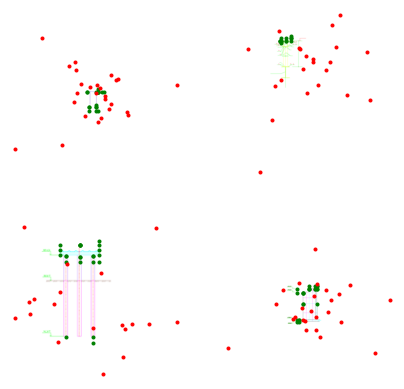

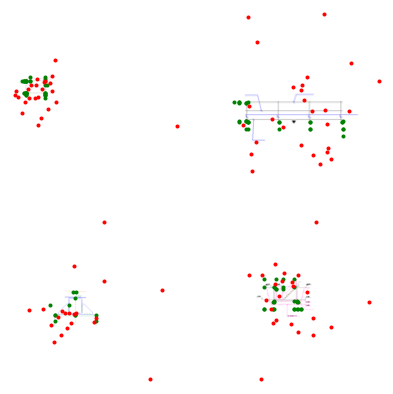

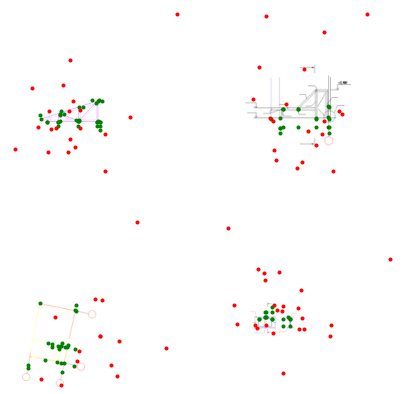

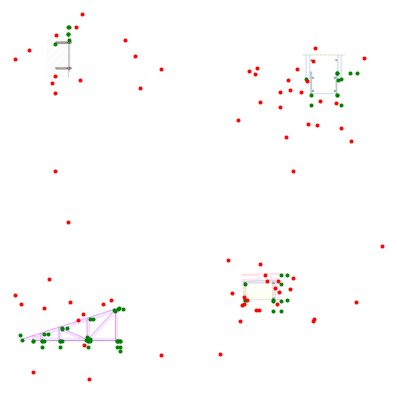

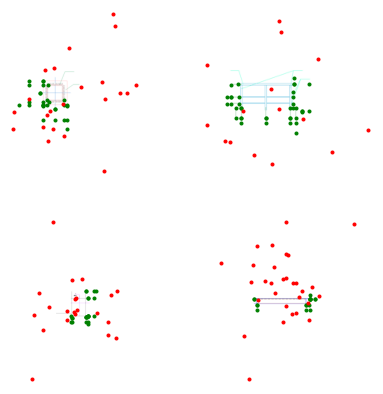

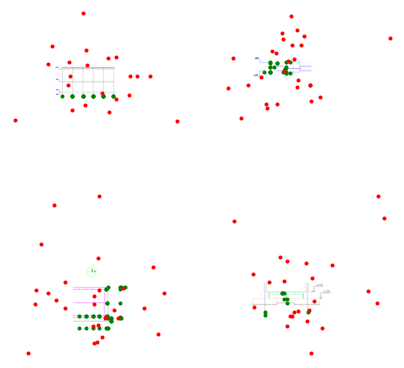

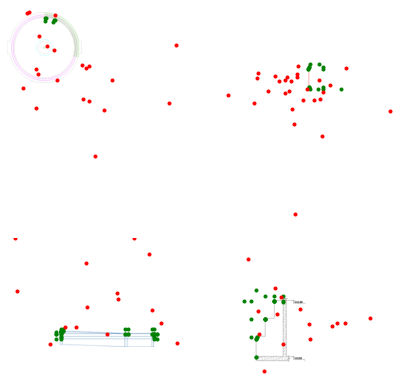

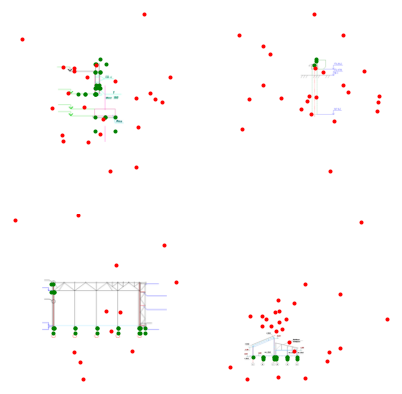

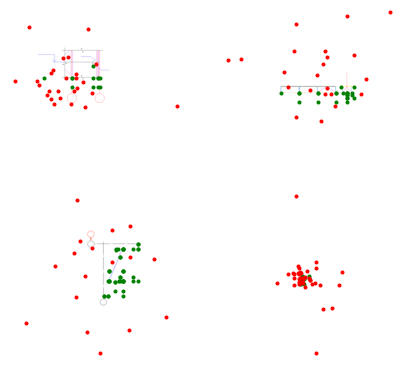

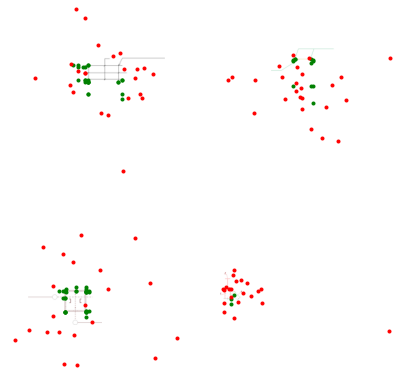

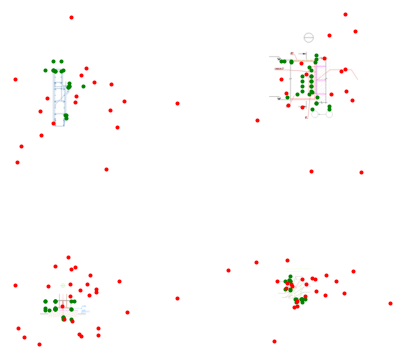

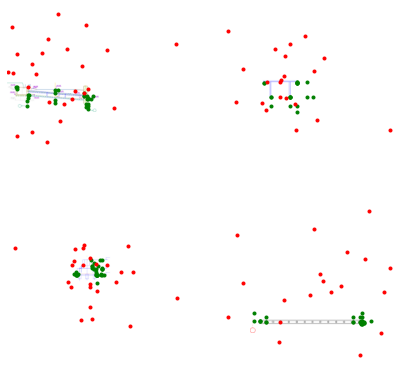

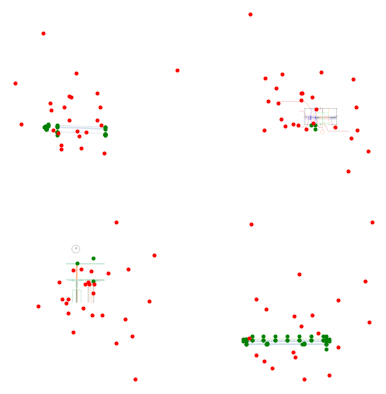

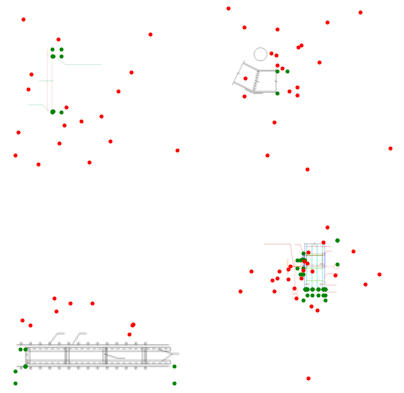

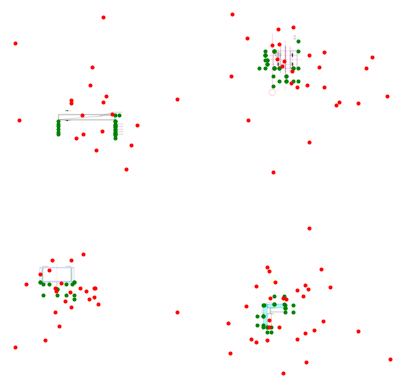

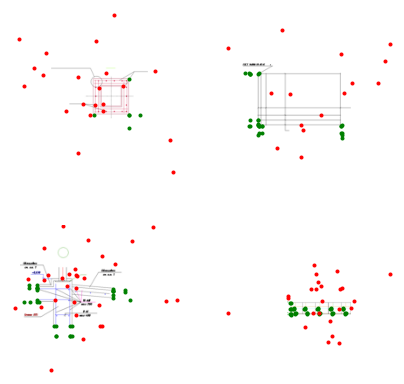

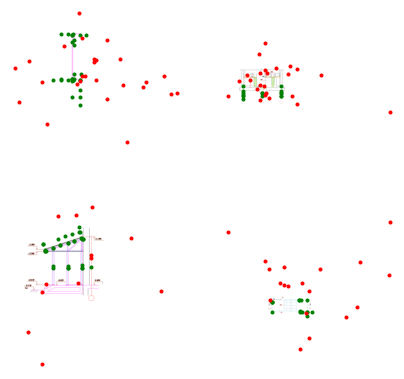

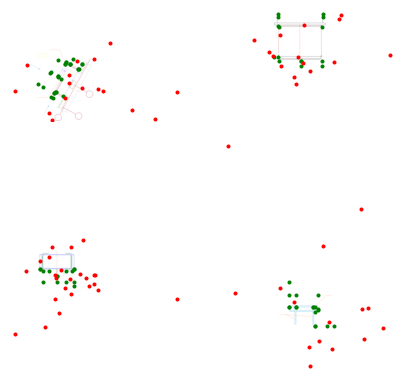

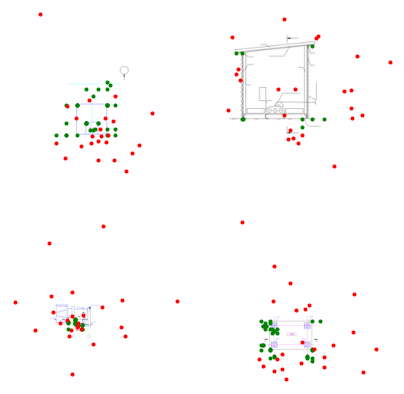

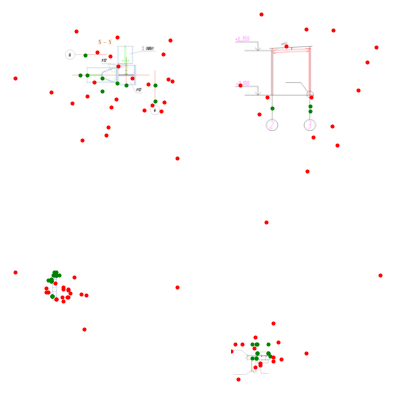

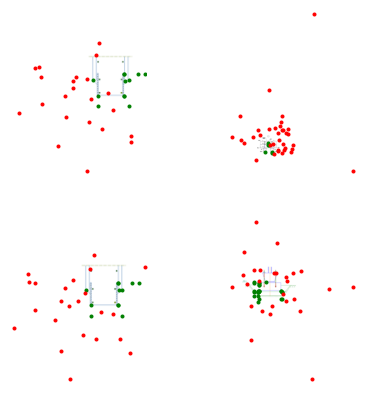

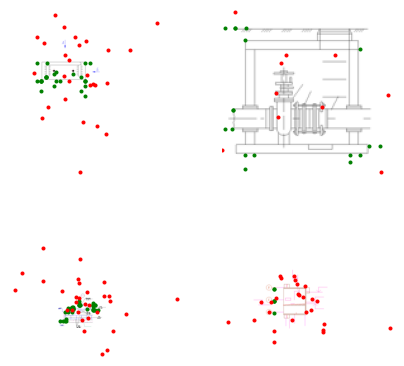

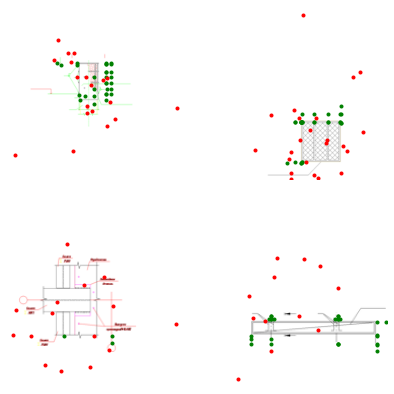

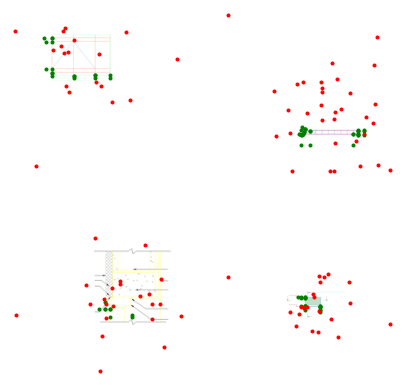

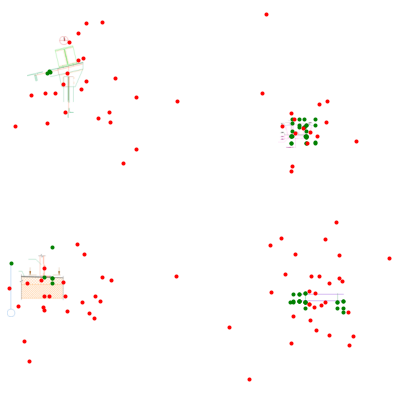

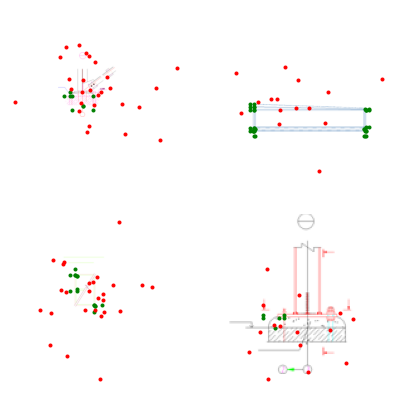

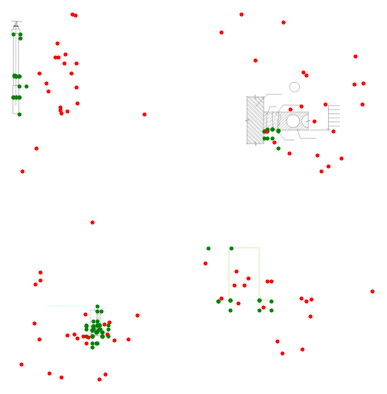

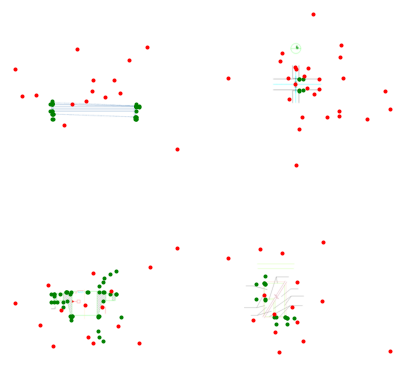

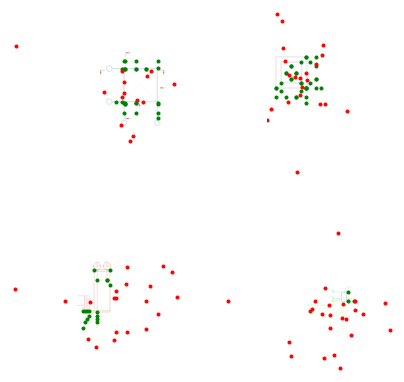

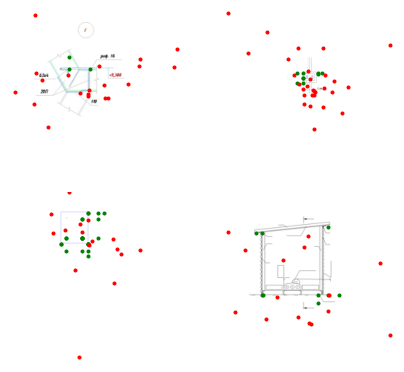

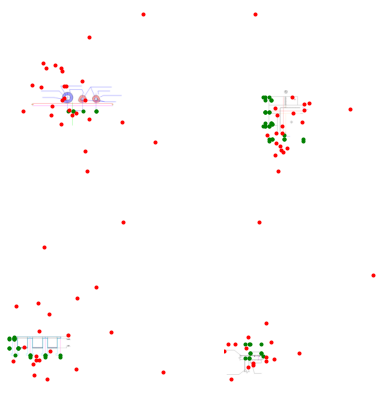

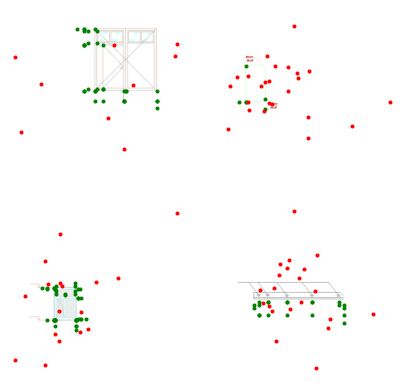

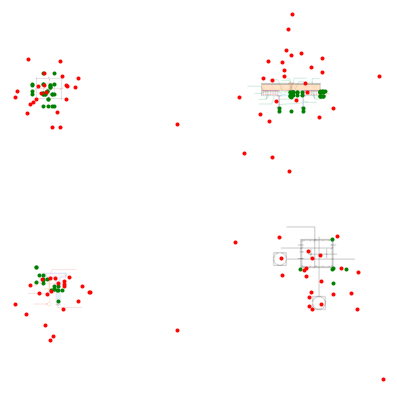

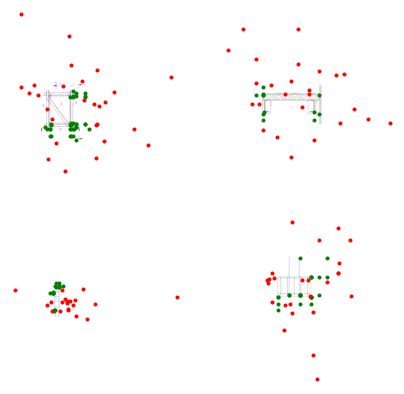

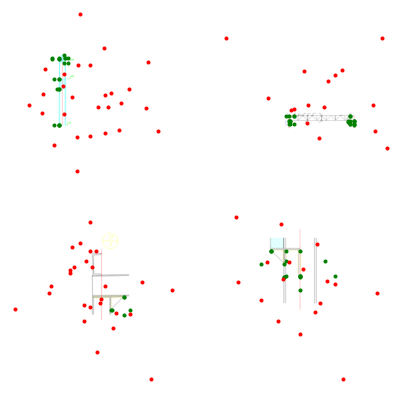

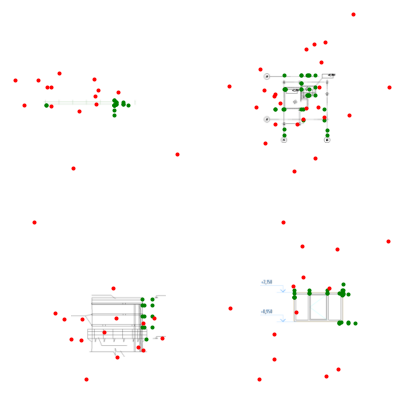

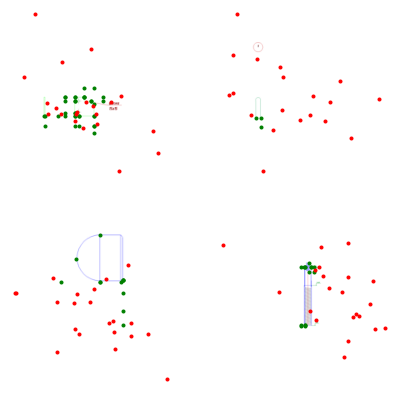

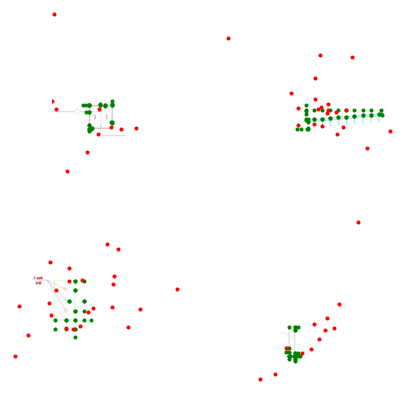

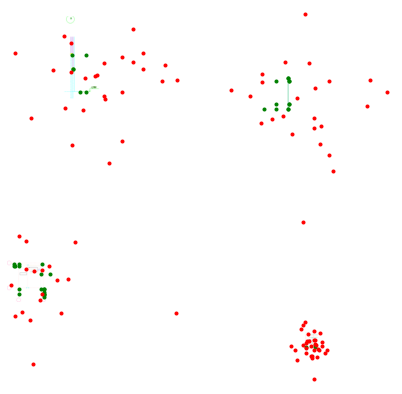

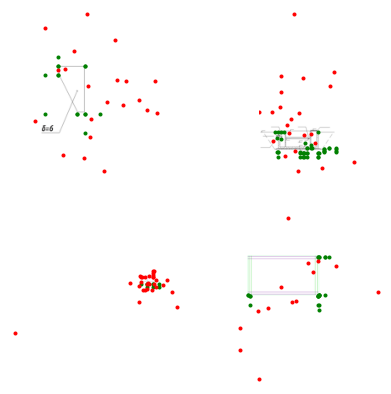

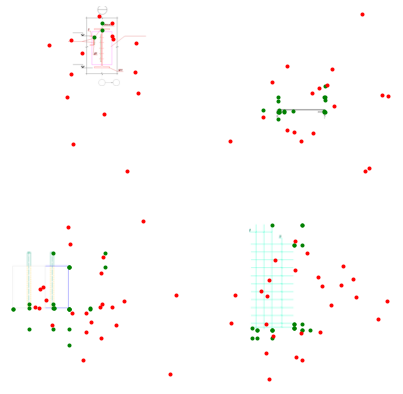

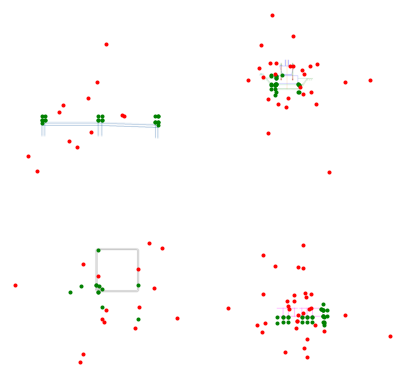

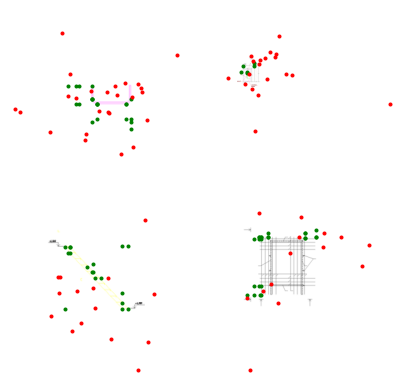

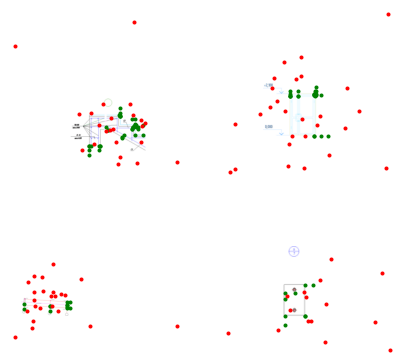

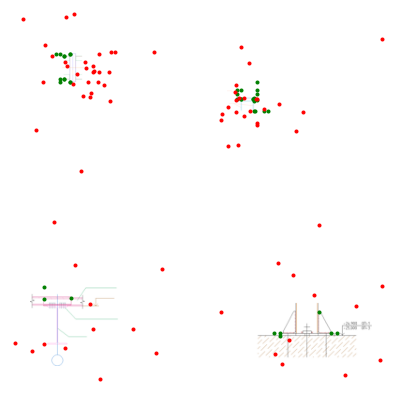

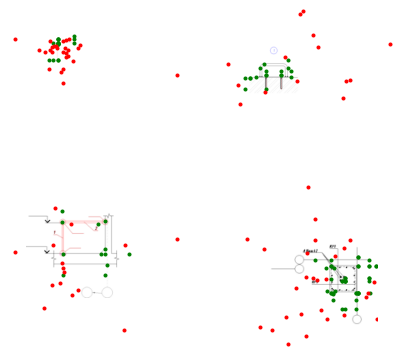

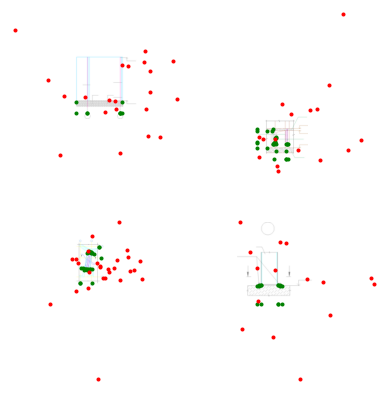

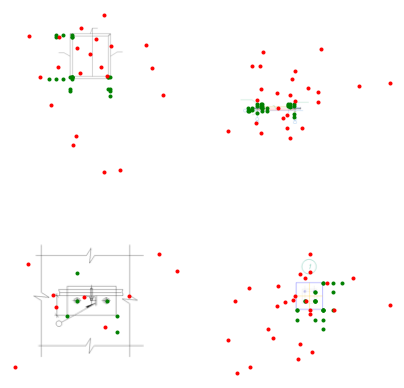

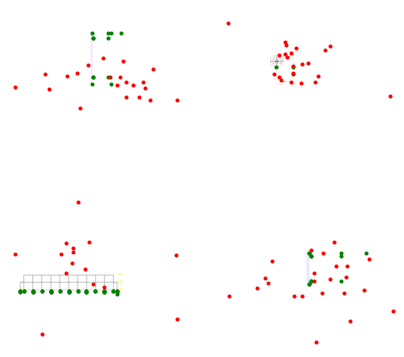

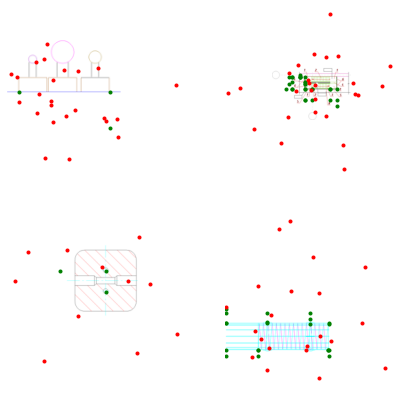

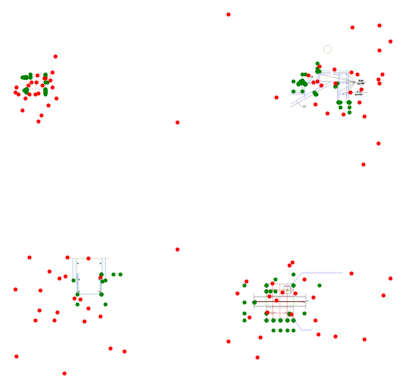

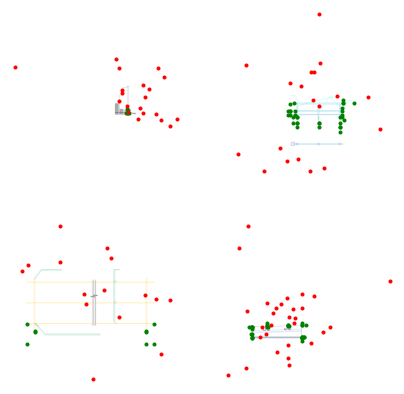

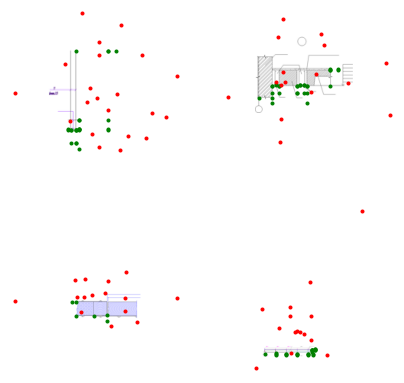

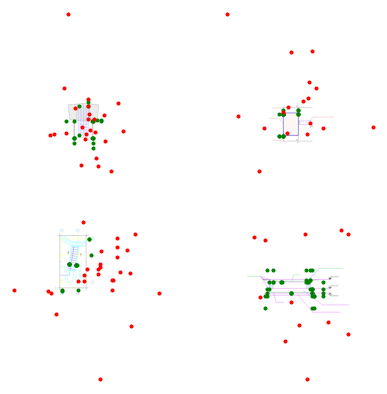

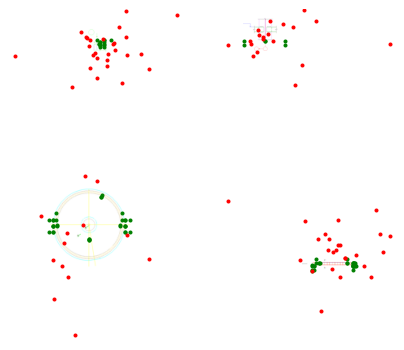

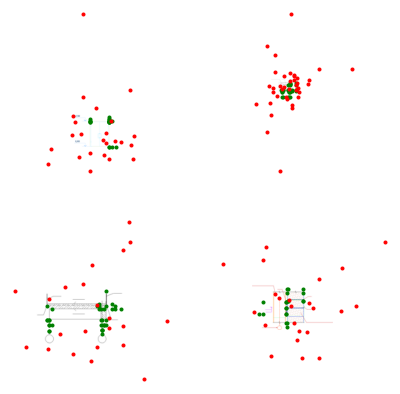

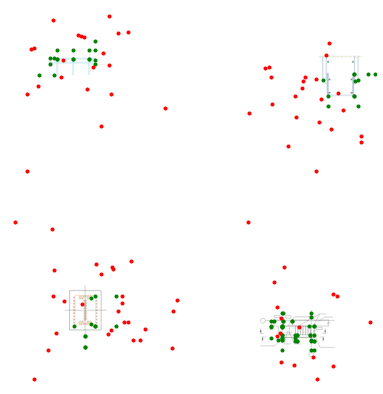

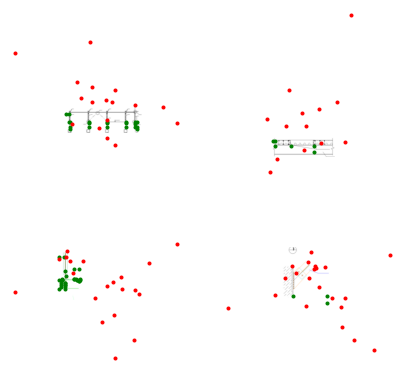

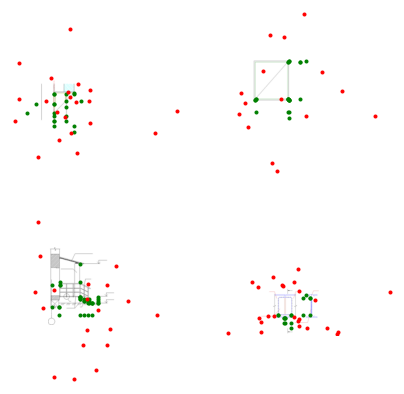

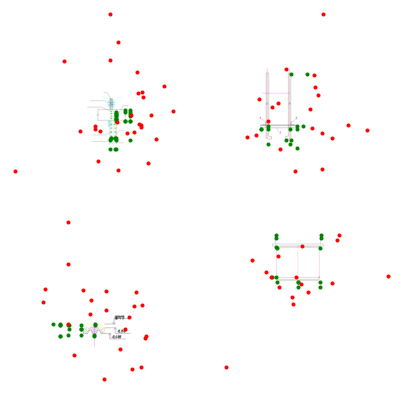

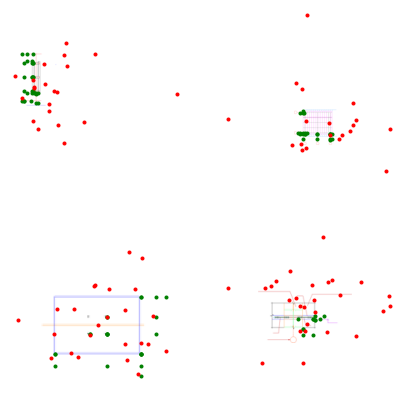

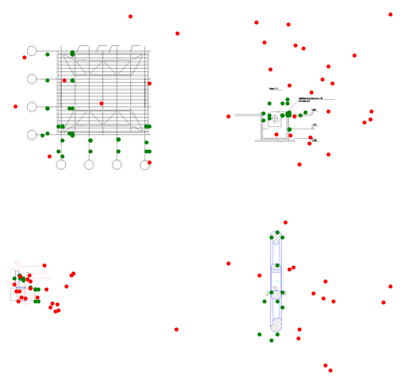

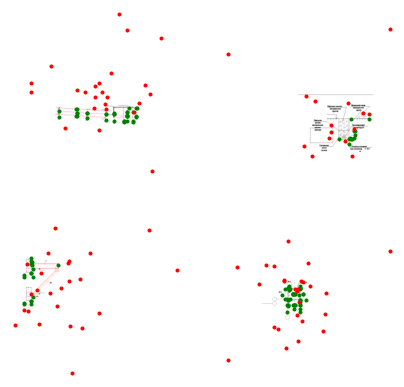

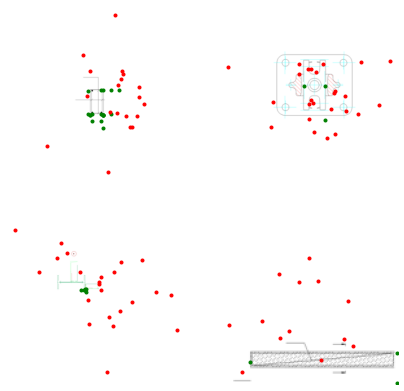

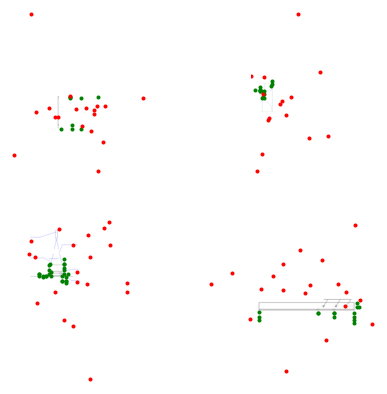

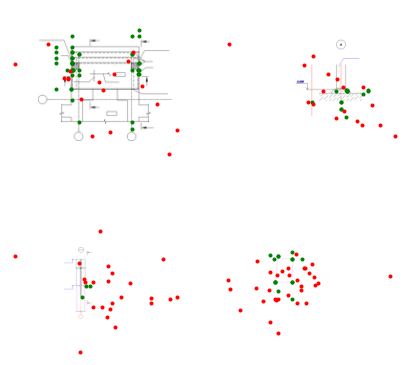

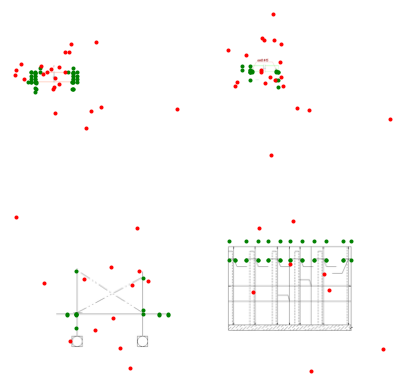

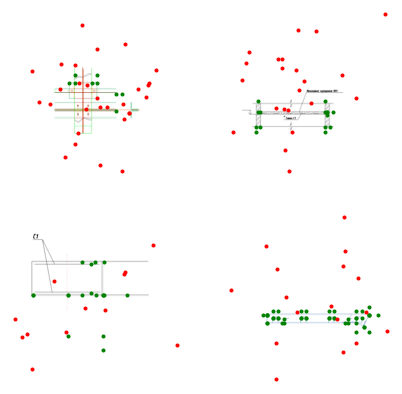

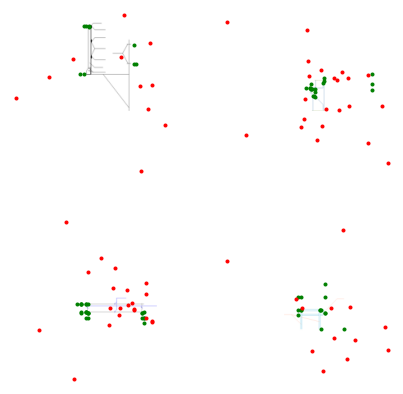

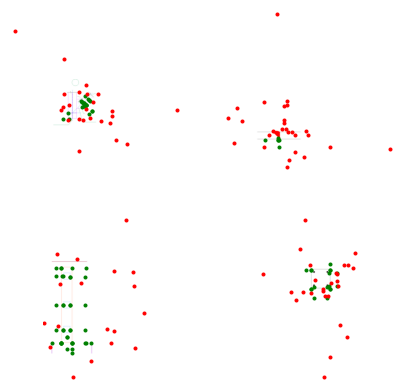

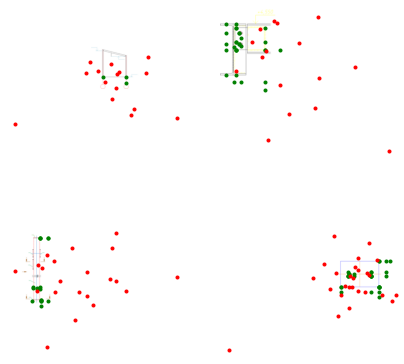

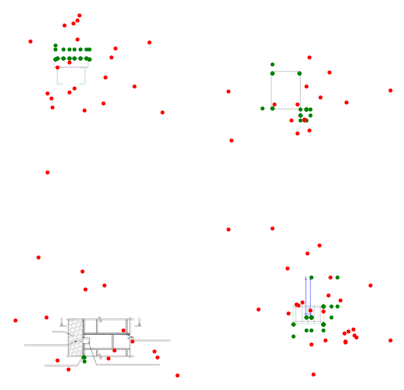

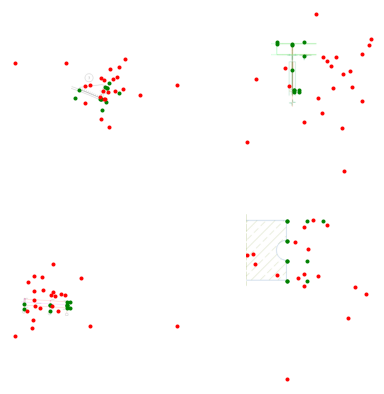

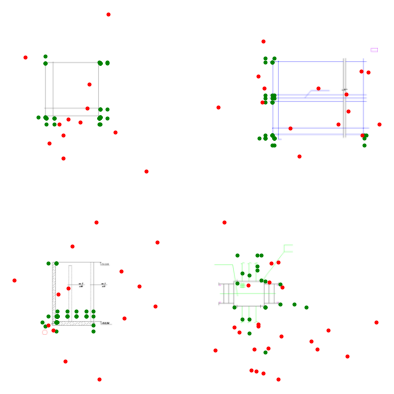

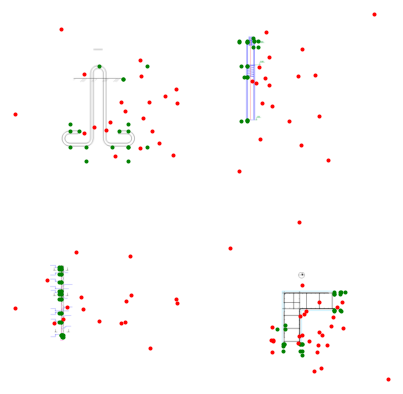

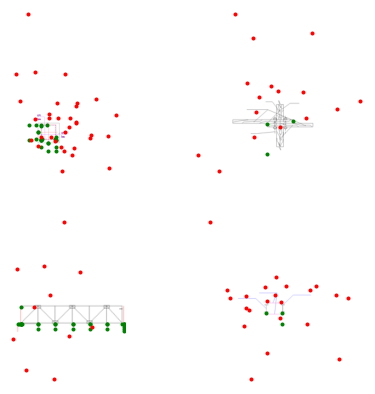

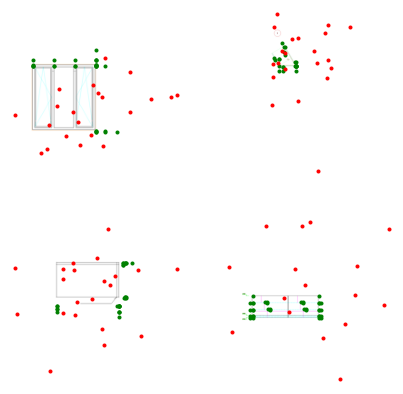

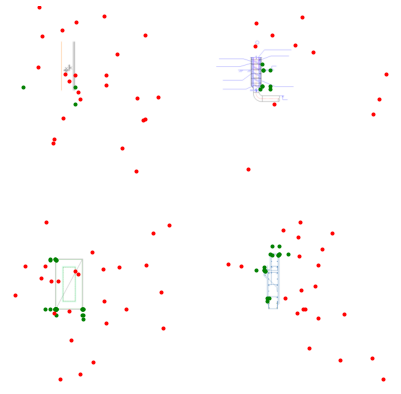

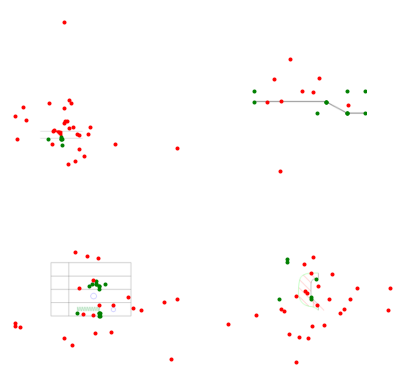

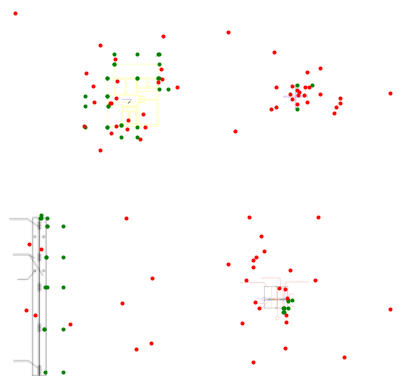

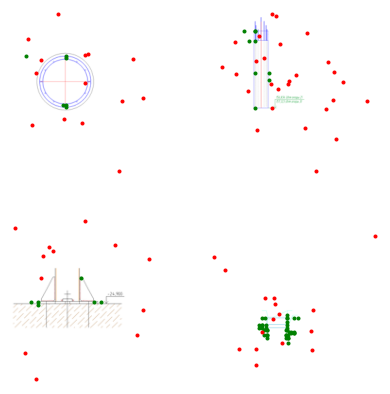

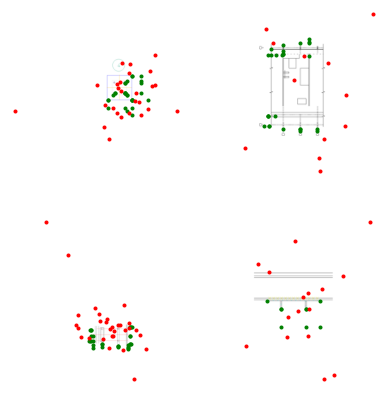

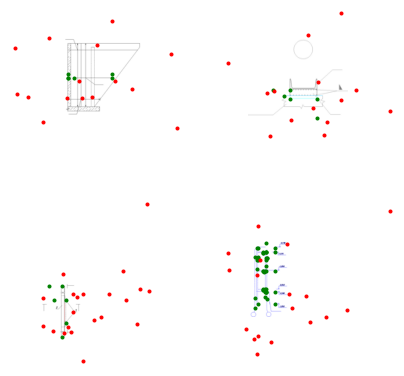

In [3]:
entities = EntityDataset()
entities.from_cache('data/ids128.cache')
dataset = DwgDataset(entities)
loader = dataset.train_loader

plot_loader_predictions(loader, model, plot_folder='runs', limit_number_of_plots=None)